In [1]:
import numpy as np
import photonics.fluorescence as fl
import matplotlib.pyplot as plt
%matplotlib notebook

# Plot lifetime text file data (CSV format)

In [2]:
# Select the required pump
pump = 1
lamp_delay = 0.1

<IPython.core.display.Javascript object>


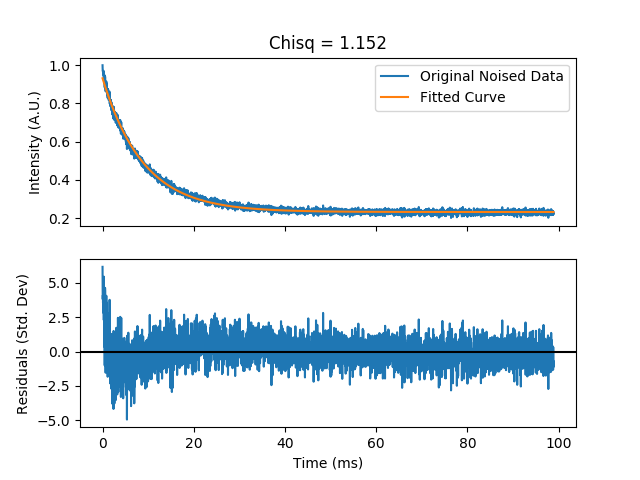

Fitted parameters: A 2073.1, tau 8.935 ms and C 685.4.


In [3]:
data = np.genfromtxt(fname='./test_data/t12_lifetime.txt', delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

x = fl.shift_time(x, length=pump+lamp_delay)
x, y = fl.reject_time(x, y, reject_start=0, reject_end=0)

popt = fl.fit_decay(x, y)
fl.plot_decay(x, y, fl.decay_fn, popt, log=False, norm=True);
print("Fitted parameters: A {0:.1f}, tau {1:.3f} ms and C {2:.1f}.".format(*popt))

# Plot Spectrum text file data

In [20]:
def plot_spectrum(x, y, norm=False):
    import matplotlib.pyplot as plt

    if norm:
        y = fl.normalise(y)

    fig, ax = plt.subplots(1)
    ax.plot(x, y)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (A.U.)')
    plt.show()
    return fig

<IPython.core.display.Javascript object>


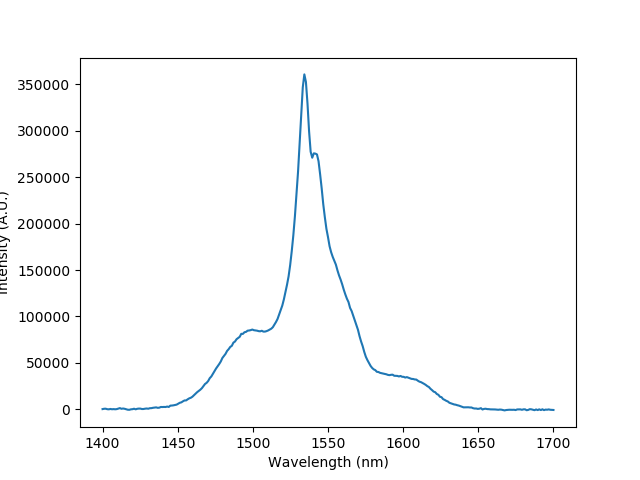

In [23]:
data = np.genfromtxt(fname='./test_data/t12_spectrum.txt', delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
x = data[:,0]
y = data[:,1]
y = fl.remove_spectrum_noise(x, y)
plot_spectrum(x, y, norm=False);